In [1]:
import sys
print('python_version',sys.version)
import pandas as pd 
print('pandas_version',pd.__version__) 
import matplotlib 
print('matplotlib_version',matplotlib.__version__)
import matplotlib.pyplot as plt  
from matplotlib import font_manager,rc 
import seaborn as sns  
print('seaborn_version',sns.__version__)
import random
sns.set_style("whitegrid") # 그래프를 그릴시 배경이 격자무늬가 되도록 설정합니다
path = "c:\Windows\Fonts\malgun.ttf" # matplotlib 에서 한글이 정상적으로 출력되도록 폰트르 별도로 설정하는 부분입니다
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name) 
a = pd.read_excel('Covid19GenAgeCaseInf.xlsx') # 각 데이터 파일을 로드합니다
b = pd.read_excel('Covid19InfState.xlsx')
c = pd.read_excel('Covid19SidoInfState.xlsx')
d = pd.read_excel('Covid19Trace.xlsx')
e = pd.read_excel('CovidNatInfState.xlsx')

python_version 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas_version 0.24.0
matplotlib_version 3.2.2
seaborn_version 0.10.1


In [2]:
a = a.sort_values('createDt') # 날짜 범위 확인 
a = a[a['gubun']!='0-11'] # 이상치 제거

In [3]:
a['count'] = 1 

In [4]:
a['createDt'] = a['createDt'].apply(lambda x :x[:10])
a # 일별 날짜를 생성

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt,count
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02,NaN,1
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02,NaN,1
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02,NaN,1
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02,NaN,1
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02,NaN,1
5,6,50-59,1851,18.91,10.0,6.17,0.54,2020-04-02,NaN,1
6,7,40-49,1312,13.41,1.0,0.62,0.08,2020-04-02,NaN,1
7,8,30-39,1012,10.34,1.0,0.62,0.10,2020-04-02,NaN,1
8,9,20-29,2656,27.14,NaN,NaN,NaN,2020-04-02,NaN,1
9,10,10-19,515,5.26,NaN,NaN,NaN,2020-04-02,NaN,1


In [5]:
a.drop_duplicates(['gubun','createDt'],keep='last',inplace=True) # 같은 날짜의 데이터가 중복될 경우 나중 데이터를 남기고 중복 제거

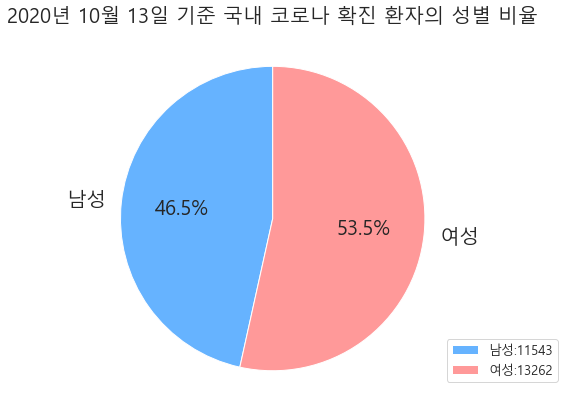

In [6]:
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
labels = ['남성', '여성']
man_ = a[a['gubun']=='남성']['confCase'].values[-1] 
woman_ = a[a['gubun']=='여성']['confCase'].values[-1]
ratio = [man_,woman_]  
plt.figure(figsize=(7, 7))
plt.title('2020년 10월 13일 기준 국내 코로나 확진 환자의 성별 비율',fontdict={"fontsize":20})
plt.pie(ratio, labels=labels, shadow=False, startangle=90, autopct='%1.1f%%',textprops={"fontsize":20},radius = 1, colors=colors[:2]) 
plt.legend(['남성:{}'.format(man_),'여성:{}'.format(woman_)],fontsize=13,bbox_to_anchor=(0.94, 0.2))
plt.show()

In [7]:
a.isnull().sum()

seq                0
gubun              0
confCase           0
confCaseRate       0
death            549
deathRate          6
criticalRate     549
createDt           0
updateDt        2013
count              0
dtype: int64

In [8]:
age = a.groupby('gubun').max()
age

,seq,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt,count
gubun,,,,,,,,,
0-9,3962,619,2.50,NaN,0.00,NaN,2020-10-13,NaN,1
10-19,3961,1362,5.83,NaN,0.00,NaN,2020-10-13,NaN,1
20-29,3960,4912,27.90,NaN,0.00,NaN,2020-10-13,NaN,1
30-39,3959,3049,12.79,2.0,0.85,0.18,2020-10-13,NaN,1
40-49,3958,3307,13.54,4.0,1.50,0.22,2020-10-13,NaN,1
50-59,3957,4574,18.91,21.0,6.77,0.77,2020-10-13,NaN,1
60-69,3956,3962,16.02,47.0,14.86,2.84,2020-10-13,NaN,1
70-79,3955,2006,8.09,142.0,33.57,11.03,2020-10-13,NaN,1
80 이상,3954,1014,4.54,218.0,51.69,26.68,2020-10-13,NaN,1


In [9]:
age = age[:-2] # 0-11 은 이상치입니다. 이상치와 성별 구분을 제거합니다
age

,seq,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt,count
gubun,,,,,,,,,
0-9,3962,619,2.50,NaN,0.00,NaN,2020-10-13,NaN,1
10-19,3961,1362,5.83,NaN,0.00,NaN,2020-10-13,NaN,1
20-29,3960,4912,27.90,NaN,0.00,NaN,2020-10-13,NaN,1
30-39,3959,3049,12.79,2.0,0.85,0.18,2020-10-13,NaN,1
40-49,3958,3307,13.54,4.0,1.50,0.22,2020-10-13,NaN,1
50-59,3957,4574,18.91,21.0,6.77,0.77,2020-10-13,NaN,1
60-69,3956,3962,16.02,47.0,14.86,2.84,2020-10-13,NaN,1
70-79,3955,2006,8.09,142.0,33.57,11.03,2020-10-13,NaN,1
80 이상,3954,1014,4.54,218.0,51.69,26.68,2020-10-13,NaN,1


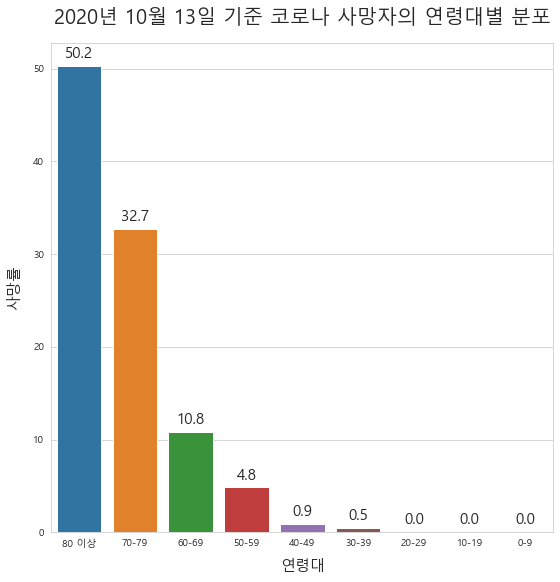

In [10]:
dearate = a[a['createDt']=='2020-10-13'].sort_values('gubun',ascending=False)[2:]
colors = sns.color_palette('pastel')
plt.figure(figsize=(9, 9))
plt.title('2020년 10월 13일 기준 코로나 사망자의 연령대별 분포',fontdict={"fontsize":20},pad=20)
g = sns.barplot(dearate.gubun,dearate.deathRate)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('연령대',labelpad=10,fontsize=15)
plt.ylabel('사망률',labelpad=10,fontsize=15)
plt.show()

<Figure size 864x576 with 0 Axes>

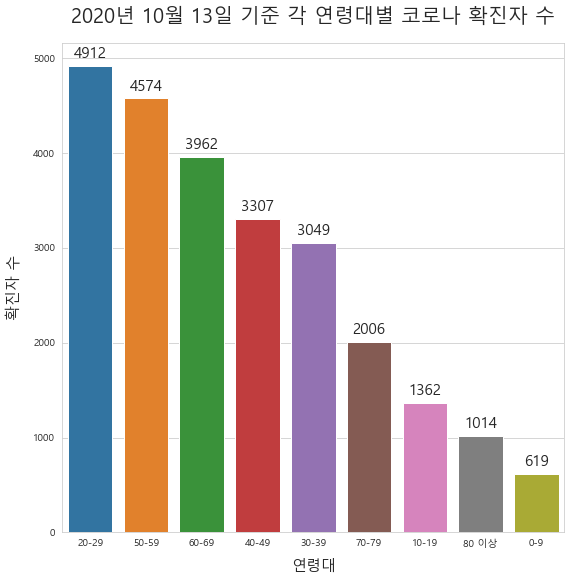

In [11]:
plt.figure(figsize=(12,8))
age = age.sort_values('confCase',ascending=False)
labels = age.index 
ratio = age['confCase'].values
plt.figure(figsize=(9, 9))
plt.title('2020년 10월 13일 기준 각 연령대별 코로나 확진자 수',fontdict={"fontsize":20},pad=20)
g = sns.barplot(age.index,ratio)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('연령대',labelpad=10,fontsize=15)
plt.ylabel('확진자 수',labelpad=10,fontsize=15)
plt.show()

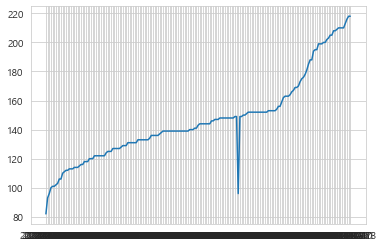

In [12]:
plt.plot(a[a['gubun']=='80 이상'].createDt,a[a['gubun']=='80 이상'].death)
plt.show() # 이상치 추측데이터 발견

In [13]:
a[a['gubun']=='80 이상'][100:120]

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt,count
1169,2051,80 이상,580,4.23,146.0,49.66,25.17,2020-07-18,NaN,1
1180,2073,80 이상,581,4.23,147.0,49.83,25.30,2020-07-19,NaN,1
1191,2095,80 이상,582,4.23,147.0,49.66,25.26,2020-07-20,NaN,1
1202,2117,80 이상,586,4.24,147.0,49.66,25.09,2020-07-21,NaN,1
1213,2139,80 이상,590,4.25,148.0,49.83,25.08,2020-07-22,NaN,1
1224,2161,80 이상,590,4.23,148.0,49.83,25.08,2020-07-23,NaN,1
1235,2183,80 이상,592,4.23,148.0,49.66,25.00,2020-07-24,NaN,1
1246,2205,80 이상,594,4.22,148.0,49.66,24.92,2020-07-25,NaN,1
1257,2227,80 이상,596,4.21,148.0,49.66,24.83,2020-07-26,NaN,1
1268,2249,80 이상,597,4.21,148.0,49.50,24.79,2020-07-27,NaN,1


In [14]:
a = a[a['createDt'] != '2020-08-02'] # 이상치

In [15]:
a['createDt'] = pd.to_datetime(a['createDt'])

C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


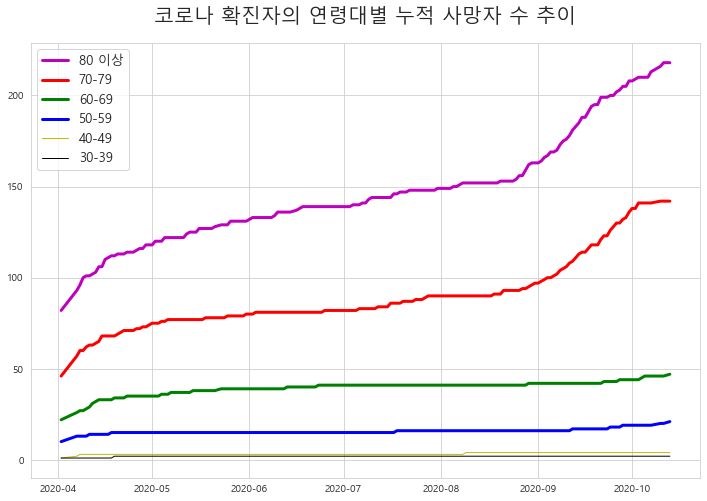

In [16]:
plt.figure(figsize=(12,8)) 
plt.title('코로나 확진자의 연령대별 누적 사망자 수 추이',fontsize=20, pad = 20) 
plt.plot(a[a['gubun']=='80 이상'].createDt,a[a['gubun']=='80 이상'].death,linewidth=3,color='m',label ='80 이상') 
plt.plot(a[a['gubun']=='70-79'].createDt,a[a['gubun']=='70-79'].death,linewidth=3,color='r',label ='70-79') 
plt.plot(a[a['gubun']=='60-69'].createDt,a[a['gubun']=='60-69'].death,linewidth=3,color='g',label ='60-69') 
plt.plot(a[a['gubun']=='50-59'].createDt,a[a['gubun']=='50-59'].death,linewidth=3,color='b',label ='50-59') 
plt.plot(a[a['gubun']=='40-49'].createDt,a[a['gubun']=='40-49'].death,linewidth=1,color='y',label ='40-49') 
plt.plot(a[a['gubun']=='30-39'].createDt,a[a['gubun']=='30-39'].death,linewidth=1,color='black',label ='30-39')  
plt.legend(fontsize= 13, loc='best')
plt.show()

In [17]:
print(b.shape)
print(b.isnull().sum())

(291, 14)
seq                 0
stateDt             0
stateTime           0
decideCnt           2
clearCnt            3
examCnt             2
deathCnt           37
careCnt            60
resutlNegCnt       60
accExamCnt         60
accExamCompCnt     60
accDefRate         60
createDt            0
updateDt          267
dtype: int64


In [18]:
b.drop(['createDt','updateDt','seq'],axis=1,inplace=True)

In [19]:
b.drop_duplicates('stateDt',keep='last',inplace=True)

In [20]:
b.shape

(257, 11)

In [21]:
print(b.isnull().sum())

stateDt            0
stateTime          0
decideCnt          2
clearCnt           2
examCnt            2
deathCnt          18
careCnt           30
resutlNegCnt      30
accExamCnt        30
accExamCompCnt    30
accDefRate        30
dtype: int64


In [22]:
b # 2월 5일 이전 Nan 값이 많으니 삭제함

,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate
0,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
6,20200206,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN
8,20200207,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN
13,20200208,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN
15,20200209,16:00,27.0,3.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN
17,20200210,16:00,27.0,3.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
b['stateDt'] = pd.to_datetime(b['stateDt'].astype(str))

In [24]:
# 검사진행수, 누적검사 완료수, 확진자수, 결과음성수
b[['examCnt','accExamCompCnt','decideCnt','resutlNegCnt',]]

,examCnt,accExamCompCnt,decideCnt,resutlNegCnt
0,1.0,NaN,NaN,NaN
1,2.0,NaN,2.0,NaN
2,NaN,NaN,15.0,NaN
3,NaN,NaN,NaN,NaN
5,40.0,NaN,19.0,NaN
6,169.0,NaN,23.0,NaN
8,327.0,NaN,24.0,NaN
13,939.0,NaN,24.0,NaN
15,888.0,NaN,27.0,NaN
17,531.0,NaN,27.0,NaN


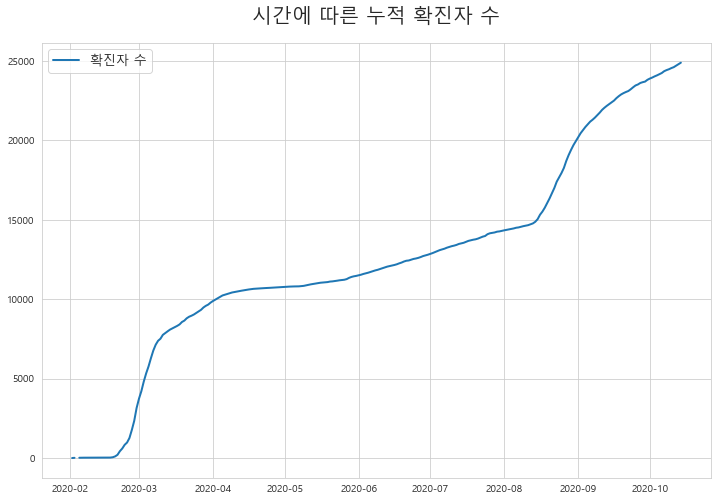

In [25]:
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 누적 확진자 수',fontsize=20, pad= 20) 
plt.plot(b.stateDt,b.decideCnt,linewidth=2,label ='확진자 수')  
plt.legend(fontsize= 13, loc='best')
plt.show()

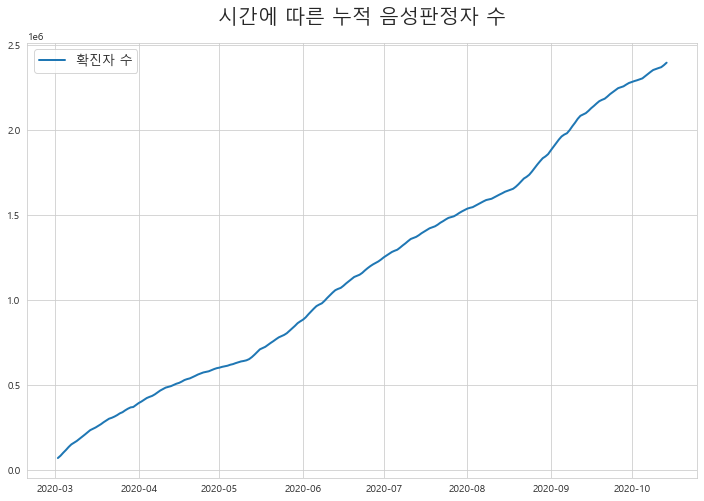

In [26]:
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 누적 음성판정자 수',fontsize=20, pad= 20) 
plt.plot(b.stateDt,b.resutlNegCnt,linewidth=2,label ='확진자 수')  
plt.legend(fontsize= 13, loc='best')
plt.show()

In [27]:
# 검사진행수, 누적검사 완료수, 확진자수, 결과음성수
#b[['examCnt','accExamCompCnt','decideCnt','resutlNegCnt',]]

In [28]:
b['today_nu'] = 1 #  
b['today_x'] = 1

In [29]:
b.reset_index(drop=True,inplace=True)

In [30]:
b

,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,today_nu,today_x
0,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1,1
2,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5,2020-02-06,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
6,2020-02-07,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
7,2020-02-08,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
8,2020-02-09,16:00,27.0,3.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,2020-02-10,16:00,27.0,3.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [31]:
for i in b.index: 
    if i == 0: 
        continue
    else:        
        b['today_nu'][i] = b['accExamCompCnt'][i]-b['accExamCompCnt'][i-1] 
        b['today_x'][i] = b['decideCnt'][i]-b['decideCnt'][i-1]

C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pcn\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
b['late'] = 1

In [33]:
b['late'] = b['today_x']/b['today_nu']

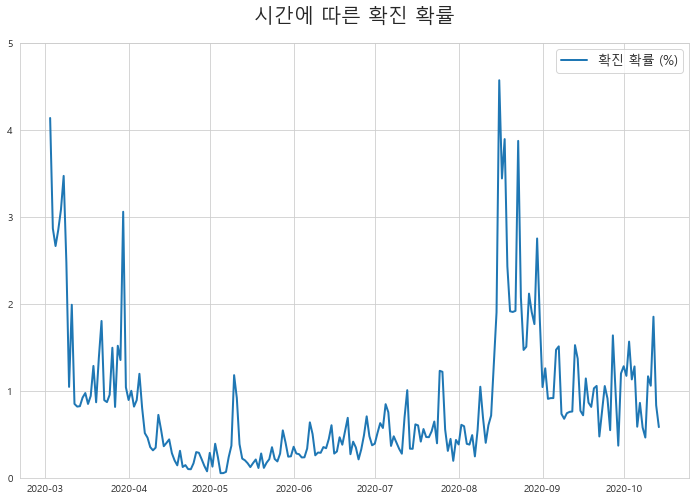

In [34]:
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 확진 확률',fontsize=20, pad= 20) 
plt.plot(b.stateDt[15:],b.late[15:]*100,linewidth=2,label ='확진 확률 (%)') 
plt.ylim([0,5])
plt.legend(fontsize= 13, loc='best')
plt.show()

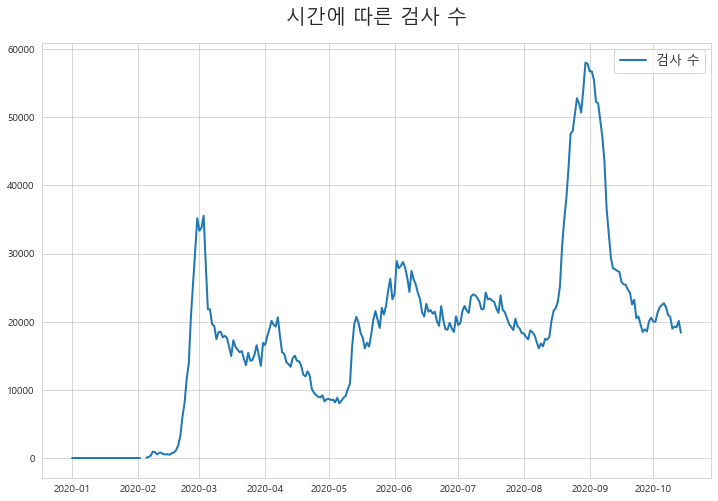

In [35]:
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 검사 수',fontsize=20, pad= 20) 
plt.plot(b.stateDt,b.examCnt,linewidth=2,label ='검사 수')  
plt.legend(fontsize= 13, loc='best')
plt.show()

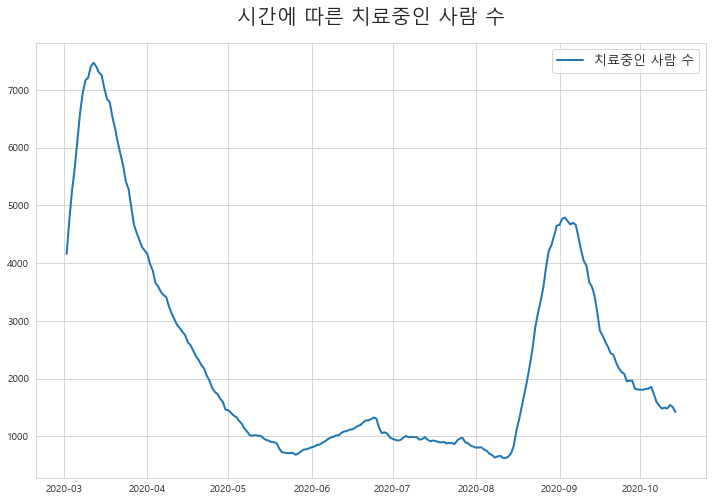

In [36]:
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 치료중인 사람 수',fontsize=20, pad= 20) 
plt.plot(b.stateDt,b.careCnt,linewidth=2,label ='치료중인 사람 수')  
plt.legend(fontsize= 13, loc='best')
plt.show()

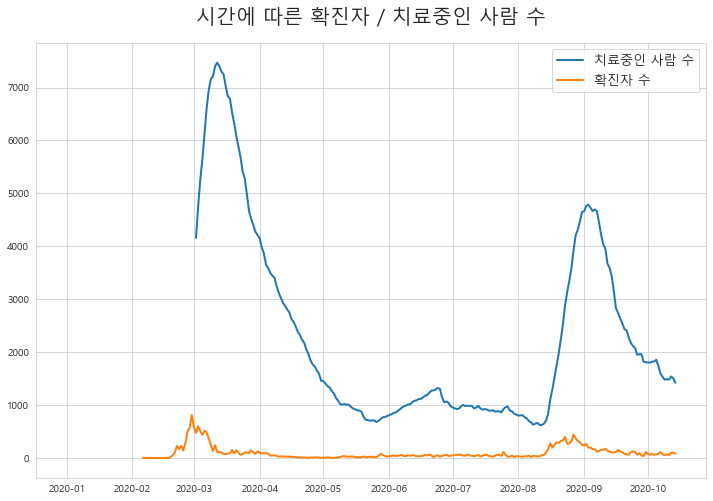

In [37]:
b.careCnt[26:50]
plt.figure(figsize=(12,8)) 
plt.title('시간에 따른 확진자 / 치료중인 사람 수',fontsize=20, pad= 20) 
plt.plot(b.stateDt,b.careCnt,linewidth=2,label ='치료중인 사람 수')   
plt.plot(b.stateDt,b.today_x,linewidth=2,label ='확진자 수')  
plt.legend(fontsize= 13, loc='best')
plt.show()

In [38]:
c = pd.read_excel('Covid19SidoInfState.xlsx')
c.drop(['gubunCn','gubunEn','createDt','updateDt'],axis=1,inplace=True)  
c['stdDay'] = c['stdDay'].apply(lambda x : pd.to_datetime(x.replace('년 ','-').replace('월 ','-').replace('일 ','-')[:-3]))
c.drop_duplicates(['gubun','stdDay'],keep='last',inplace=True) # 같은 날짜의 데이터가 중복될 경우 나중 데이터를 남기고 중복 제거
c

,seq,stdDay,gubun,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt
0,1,2020-03-01,합계,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-03-01,서울,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-01,부산,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2020-03-01,대구,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2020-03-01,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2020-03-01,광주,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2020-03-01,대전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2020-03-01,울산,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-03-01,세종,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2020-03-01,경기,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
c[c['stdDay']=='2020년 10월 14일 00시']
regi = c.groupby('gubun').max() # 지역별 확진자, 사망자

In [40]:
regi = regi[:-1] # 합계 제거 
regi = regi[regi.index!= '검역']
regi

,seq,stdDay,deathCnt,incDec,isolClearCnt,defCnt,isolIngCnt,overFlowCnt,localOccCnt
gubun,,,,,,,,,
강원,5015,2020-10-14,3.0,18.0,220.0,231.0,105.0,2.0,18.0
경기,5014,2020-10-14,86.0,125.0,4277.0,4744.0,1314.0,18.0,124.0
경남,5021,2020-10-14,NaN,12.0,286.0,297.0,70.0,3.0,12.0
경북,5020,2020-10-14,56.0,123.0,1490.0,1570.0,305.0,4.0,7.0
광주,5010,2020-10-14,3.0,39.0,493.0,499.0,160.0,6.0,39.0
대구,5008,2020-10-14,196.0,469.0,6933.0,7141.0,1562.0,3.0,30.0
대전,5011,2020-10-14,5.0,15.0,354.0,412.0,99.0,2.0,15.0
부산,5007,2020-10-14,4.0,18.0,423.0,491.0,96.0,3.0,16.0
서울,5006,2020-10-14,66.0,154.0,5050.0,5607.0,2068.0,7.0,154.0


In [41]:
regi = regi.dropna()

In [42]:
regi = regi.sort_values(by='deathCnt',ascending=False)

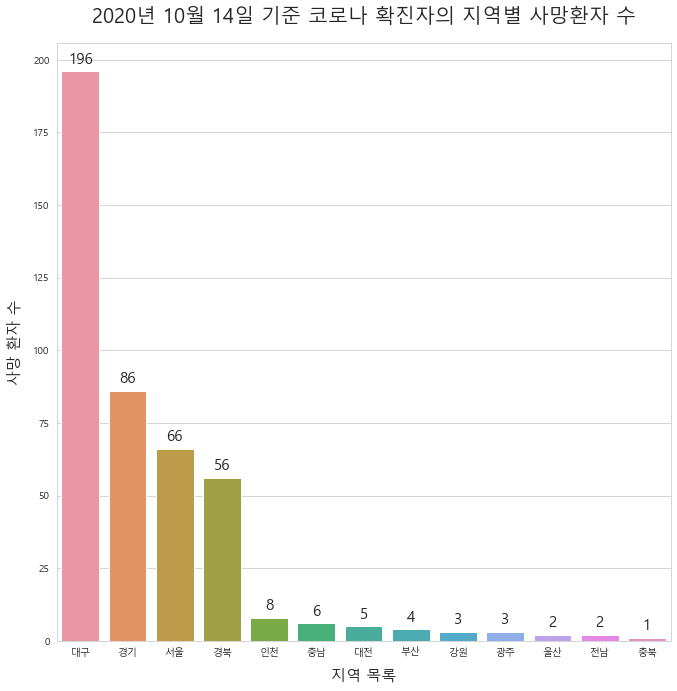

In [43]:
labels = regi.index 
ratio = regi.deathCnt
plt.figure(figsize=(11, 11))
plt.title('2020년 10월 14일 기준 코로나 확진자의 지역별 사망환자 수',fontdict={"fontsize":20},pad=20)
g = sns.barplot(labels,ratio) 
for p in g.patches:
    g.annotate(format(p.get_height(),'.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('지역 목록',labelpad=10,fontsize=15)
plt.ylabel('사망 환자 수',labelpad=10,fontsize=15)
plt.show()

In [44]:
hwa = c.groupby('gubun').max() # 지역별 확진자

In [45]:
hwa = hwa[:-1] # 합계 제거 
hwa = hwa[hwa.index!= '검역']
hwa

,seq,stdDay,deathCnt,incDec,isolClearCnt,defCnt,isolIngCnt,overFlowCnt,localOccCnt
gubun,,,,,,,,,
강원,5015,2020-10-14,3.0,18.0,220.0,231.0,105.0,2.0,18.0
경기,5014,2020-10-14,86.0,125.0,4277.0,4744.0,1314.0,18.0,124.0
경남,5021,2020-10-14,NaN,12.0,286.0,297.0,70.0,3.0,12.0
경북,5020,2020-10-14,56.0,123.0,1490.0,1570.0,305.0,4.0,7.0
광주,5010,2020-10-14,3.0,39.0,493.0,499.0,160.0,6.0,39.0
대구,5008,2020-10-14,196.0,469.0,6933.0,7141.0,1562.0,3.0,30.0
대전,5011,2020-10-14,5.0,15.0,354.0,412.0,99.0,2.0,15.0
부산,5007,2020-10-14,4.0,18.0,423.0,491.0,96.0,3.0,16.0
서울,5006,2020-10-14,66.0,154.0,5050.0,5607.0,2068.0,7.0,154.0


In [46]:
_10_bal =c[c['stdDay']=='2020-10-14'][1:-1] 
_10_bal.qurRate =_10_bal.qurRate.astype('float')
_10_bal = _10_bal.sort_values(by='qurRate',ascending=False)

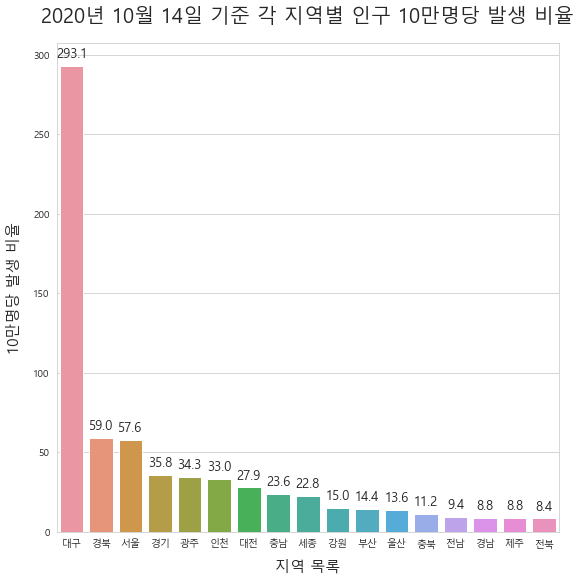

In [47]:
labels =_10_bal.gubun
ratio = _10_bal.qurRate
plt.figure(figsize=(9, 9))
plt.title('2020년 10월 14일 기준 각 지역별 인구 10만명당 발생 비율',fontdict={"fontsize":20},pad=20)
g = sns.barplot(labels,ratio) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('지역 목록',labelpad=10,fontsize=15)
plt.ylabel('10만명당 발생 비율',labelpad=10,fontsize=15)
plt.show()

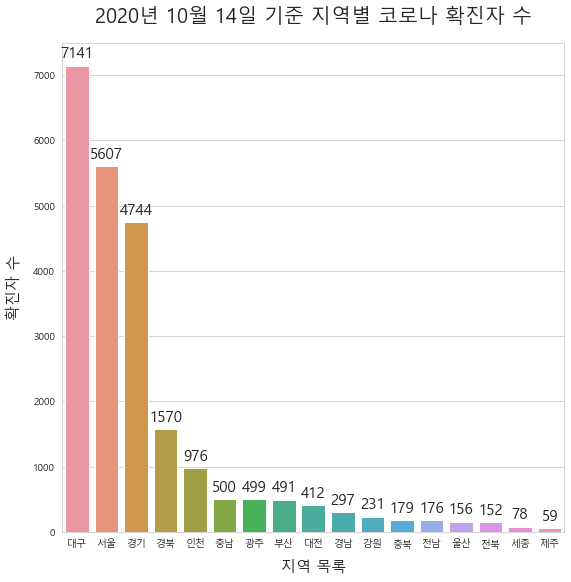

In [48]:
colors = sns.color_palette('pastel')
hwa = hwa.sort_values('defCnt',ascending=False)
labels =hwa.index 
ratio = hwa.defCnt
plt.figure(figsize=(9, 9))
plt.title('2020년 10월 14일 기준 지역별 코로나 확진자 수',fontdict={"fontsize":20},pad=20)
g = sns.barplot(labels,ratio)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xlabel('지역 목록',labelpad=10,fontsize=15)
plt.ylabel('확진자 수',labelpad=10,fontsize=15)
plt.show() 

In [49]:
colors = sns.color_palette('Set3')

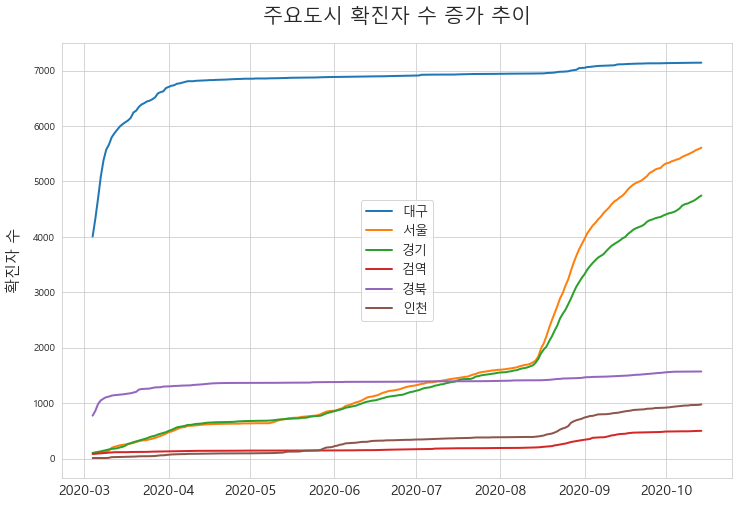

In [50]:
plt.figure(figsize=(12,8)) 
plt.title('주요도시 확진자 수 증가 추이',fontsize=20, pad = 20) 
plt.plot(c[c['gubun']=='대구'].stdDay,c[c['gubun']=='대구'].defCnt,linewidth=2,label ='대구')
plt.plot(c[c['gubun']=='서울'].stdDay,c[c['gubun']=='서울'].defCnt,linewidth=2,label ='서울') 
plt.plot(c[c['gubun']=='경기'].stdDay,c[c['gubun']=='경기'].defCnt,linewidth=2,label ='경기') 
plt.plot(c[c['gubun']=='충남'].stdDay,c[c['gubun']=='충남'].defCnt,linewidth=2,label ='검역') 
plt.plot(c[c['gubun']=='경북'].stdDay,c[c['gubun']=='경북'].defCnt,linewidth=2,label ='경북') 
plt.plot(c[c['gubun']=='인천'].stdDay,c[c['gubun']=='인천'].defCnt,linewidth=2,label ='인천')   
plt.xticks(fontsize=14)
#plt.xlabel('날짜',labelpad=10,fontsize=15)
plt.ylabel('확진자 수',labelpad=10,fontsize=15)
plt.legend(fontsize= 13, loc='best')
plt.show()

In [51]:
abo = c[c['gubun'] != '합계'] 
abo = abo[abo['gubun'] != '검역']

In [52]:
abo['mon'] = abo.stdDay.apply(lambda x:str(x)[:7])

In [53]:
abo.groupby('gubun').sum().sort_values('overFlowCnt')

,seq,deathCnt,incDec,isolClearCnt,defCnt,isolIngCnt,overFlowCnt,localOccCnt
gubun,,,,,,,,
제주,577328,0.0,56.0,4261.0,5438.0,1050.0,13.0,34.0
강원,575753,540.0,217.0,16174.0,20802.0,3437.0,14.0,168.0
세종,575303,0.0,77.0,9510.0,11489.0,993.0,14.0,18.0
대전,574853,329.0,399.0,23975.0,30961.0,6019.0,27.0,347.0
울산,575078,222.0,139.0,12165.0,15038.0,1935.0,29.0,87.0
충북,575978,51.0,170.0,14088.0,17663.0,2751.0,29.0,106.0
전남,576653,33.0,171.0,7723.0,11960.0,4028.0,33.0,128.0
부산,573953,662.0,402.0,36451.0,44827.0,5939.0,36.0,330.0
전북,576428,0.0,145.0,7211.0,9961.0,2570.0,36.0,99.0


In [54]:
abom = abo[['stdDay','gubun','overFlowCnt']]

abom.stdDay = abom.stdDay.apply(lambda x: str(x)[:7])

C:\Users\pcn\Anaconda3\lib\site-packages\pandas\core\generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [55]:
abomsum = pd.DataFrame()  
abomsum['경기'] = abom[abom['gubun']=='경기'].groupby('stdDay').sum().overFlowCnt 
abomsum['서울'] = abom[abom['gubun']=='서울'].groupby('stdDay').sum().overFlowCnt
abomsum['대구'] = abom[abom['gubun']=='대구'].groupby('stdDay').sum().overFlowCnt
abomsum['인천'] = abom[abom['gubun']=='인천'].groupby('stdDay').sum().overFlowCnt
abomsum['경남'] = abom[abom['gubun']=='경남'].groupby('stdDay').sum().overFlowCnt
abomsum['충남'] = abom[abom['gubun']=='충남'].groupby('stdDay').sum().overFlowCnt
abomsum['경북'] = abom[abom['gubun']=='경북'].groupby('stdDay').sum().overFlowCnt
abomsum['광주'] = abom[abom['gubun']=='광주'].groupby('stdDay').sum().overFlowCnt
abomsum['전북'] = abom[abom['gubun']=='전북'].groupby('stdDay').sum().overFlowCnt
abomsum['부산'] = abom[abom['gubun']=='부산'].groupby('stdDay').sum().overFlowCnt 
abomsum = abomsum[1:]

Text(0.5, 0, '')

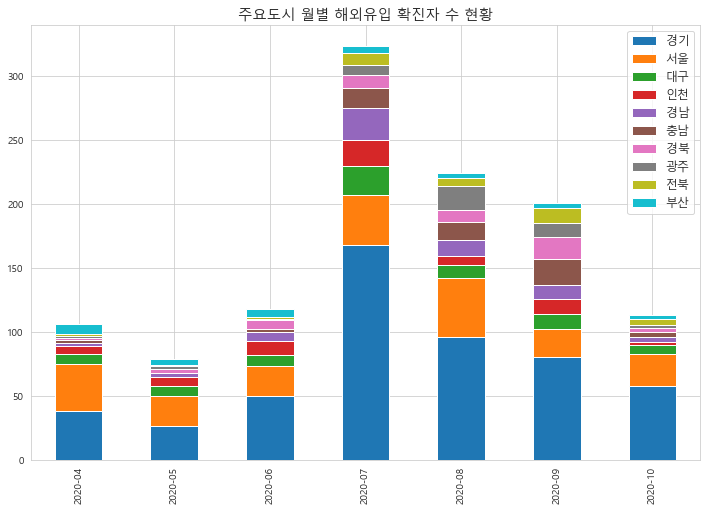

In [56]:
font = {'family' : 'normal','size'   : 12}
import matplotlib
matplotlib.rc('font', **font)
rc('font', family=font_name) 
#plt.figure(figsize=(12,8)) 
#plt.title('주요도시 월별 해외유입 확진자 수 현황',fontsize=20, pad = 20) 
abomsum.plot(kind='bar',stacked=True, figsize=(12,8),title = '주요도시 월별 해외유입 확진자 수 현황',fontsize=10) 
plt.xlabel('')

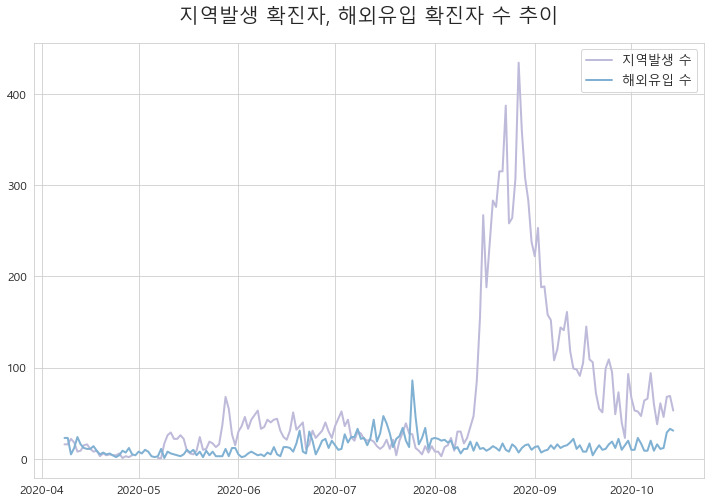

In [57]:
plt.figure(figsize=(12,8)) 
plt.title('지역발생 확진자, 해외유입 확진자 수 추이',fontsize=20, pad = 20) 
plt.plot(c[c['gubun']=='합계'][36:].stdDay,c[c['gubun']=='합계'][36:].localOccCnt,linewidth=2,color=random.choice(colors),label ='지역발생 수')
plt.plot(c[c['gubun']=='합계'][36:].stdDay,c[c['gubun']=='합계'][36:].overFlowCnt,linewidth=2,color=random.choice(colors),label ='해외유입 수')  
plt.legend(fontsize= 13, loc='best')
#plt.ylim([0,20])
plt.show()

In [58]:
c.isnull().sum()

seq                0
stdDay             0
gubun              0
deathCnt        2015
incDec          1993
isolClearCnt     138
qurRate           19
defCnt            19
isolIngCnt       781
overFlowCnt     3174
localOccCnt     2869
dtype: int64

In [59]:
e = pd.read_excel('CovidNatInfState.xlsx')

In [60]:
e['stdDay'] = e['stdDay'].apply(lambda x : pd.to_datetime(x.replace('년 ','-').replace('월 ','-').replace('일 ','-')[:-3]))

In [61]:
e.drop(['areaNmEn','areaNmCn','createDt','updateDt','nationNmEn','nationNmCn'],axis=1,inplace=True) 
print(e.shape)
e.drop_duplicates(['stdDay','areaNm','nationNm'],keep='last',inplace=True) # 같은 날짜의 데이터가 중복될 경우 나중 데이터를 남기고 중복 제거
print(e.shape)

(45328, 7)
(40935, 7)


In [62]:
e 

,seq,stdDay,areaNm,nationNm,natDefCnt,natDeathCnt,natDeathRate
0,1,2020-03-09,아시아,중국,80735,3119.0,3.863256
1,2,2020-03-09,아시아,홍콩,115,2.0,1.739130
2,3,2020-03-09,아시아,대만,45,1.0,2.222222
3,4,2020-03-09,아시아,마카오,10,NaN,0.000000
4,5,2020-03-09,아시아,일본,488,7.0,1.434426
5,6,2020-03-09,아시아,싱가포르,149,NaN,0.000000
6,7,2020-03-09,아시아,태국,50,1.0,2.000000
7,8,2020-03-09,아시아,말레이시아,93,NaN,0.000000
8,9,2020-03-09,아시아,베트남,21,NaN,0.000000
9,10,2020-03-09,아시아,인도,34,NaN,0.000000


In [63]:
e.areaNm.unique()

array(['아시아', '중동', '아메리카', '유럽', '오세아니아', '아프리카', '기타', '미주'],
      dtype=object)

In [64]:
asia = e[e['areaNm']=='아시아'] 
eu = e[e['areaNm']=='유럽'] 
jungdong = e[e['areaNm']=='중동'] 
america = e[e['areaNm']=='아메리카'] 
ohse = e[e['areaNm']=='오세아니아'] 
afri = e[e['areaNm']=='아프리카'] 
miju = e[e['areaNm']=='미주'] 

In [65]:
dae = e[e['stdDay']=='2020-10-14'].groupby('areaNm').sum() 
dae.sort_values(by='natDefCnt',inplace=True,ascending=False)

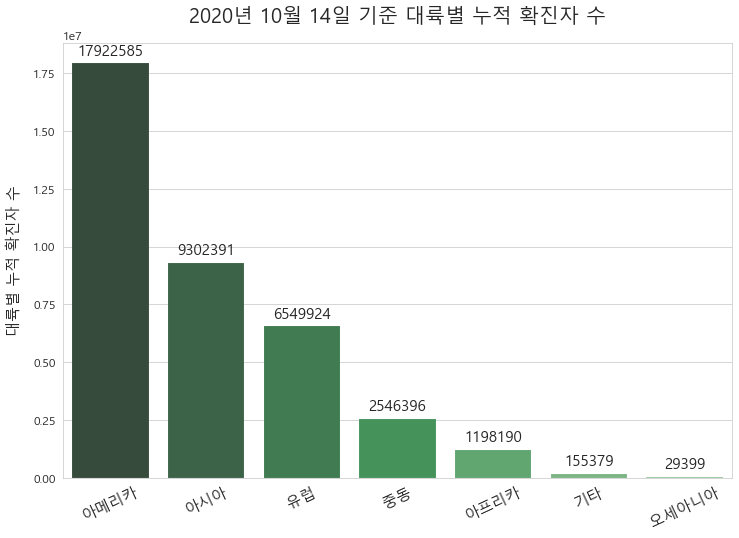

In [66]:
plt.figure(figsize=(12,8)) 
plt.title('2020년 10월 14일 기준 대륙별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(dae.index,dae.natDefCnt,linewidth=0.1,palette="Greens_d")
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=25, fontsize=15)  
plt.xlabel('') 
plt.ylabel('대륙별 누적 확진자 수',fontdict=({'size' : 15}), labelpad=10)
plt.show()

In [67]:
dae.sort_values(by='natDeathCnt',inplace=True,ascending=False)

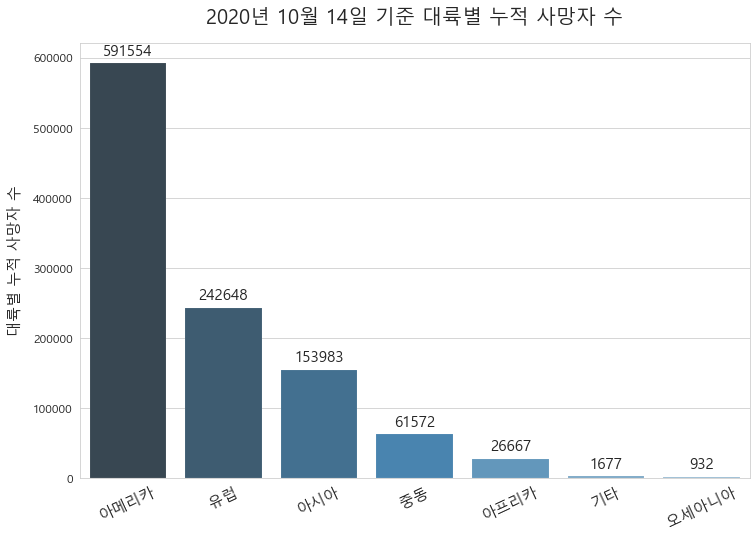

In [68]:
plt.figure(figsize=(12,8)) 
plt.title('2020년 10월 14일 기준 대륙별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(dae.index,dae.natDeathCnt,linewidth=0.1, palette="Blues_d") 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=25, fontsize=15) 
plt.xlabel('') 
plt.ylabel('대륙별 누적 사망자 수',fontdict=({'size' : 15}), labelpad=10)
plt.show()

## 아시아 국가별 확진자 / 사망자 수 

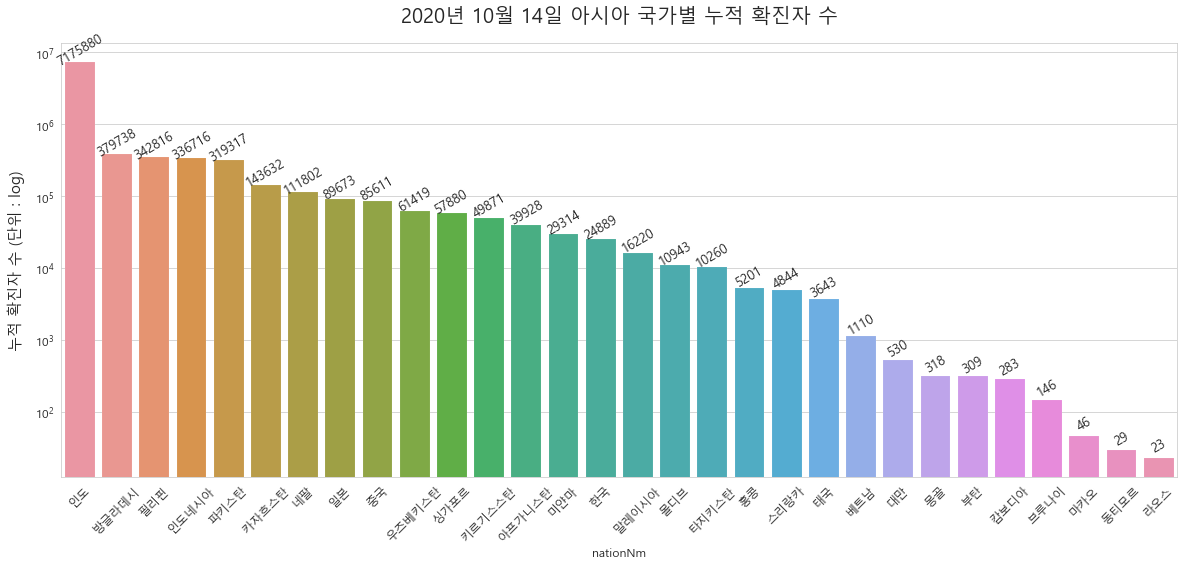

In [69]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 아시아 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(asia[asia['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm,
        asia[asia['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=30)
plt.xticks(rotation=45) 
plt.yscale('log')
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

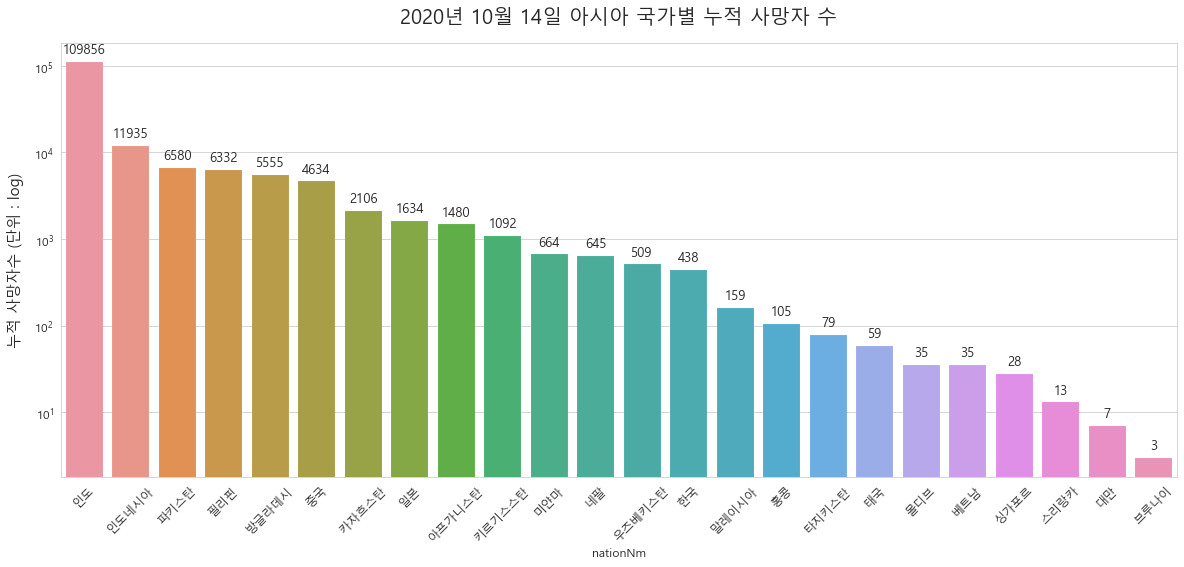

In [70]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 아시아 국가별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(asia[asia['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm[:-6],
        asia[asia['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt[:-6],linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.yscale('log')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.xticks(rotation=45)
plt.show()

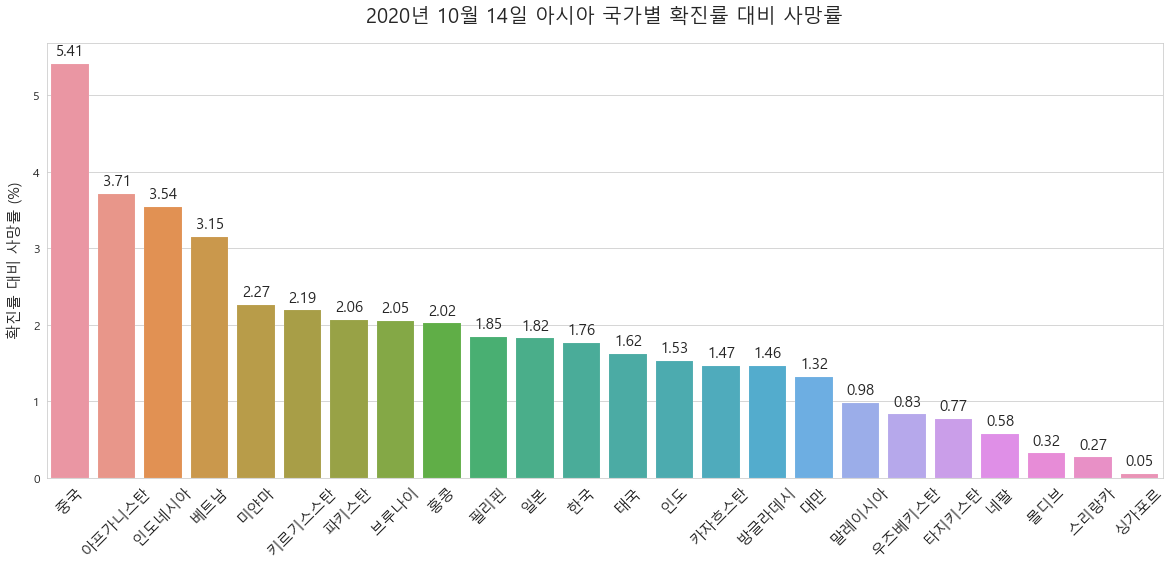

In [71]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 아시아 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(asia[asia['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm[:-6],
        asia[asia['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate[:-6],linewidth=0.1)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)' ,fontsize=15, labelpad=10)
plt.show()

## 유럽 국가별 확진자 / 사망자 수 

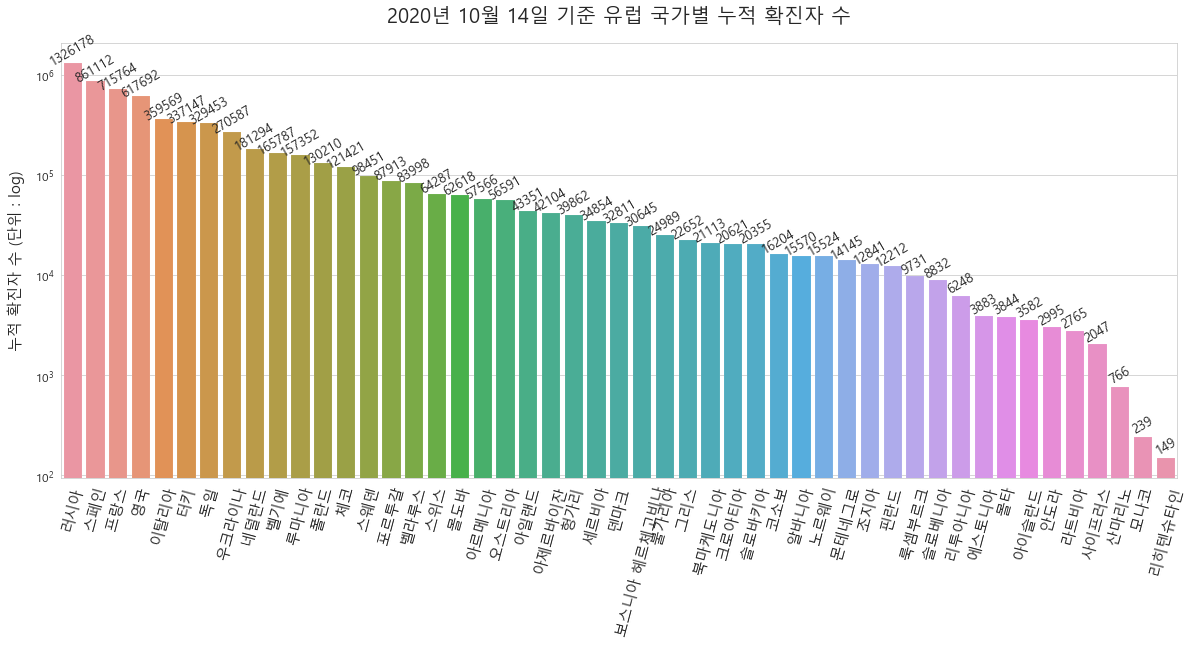

In [72]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 유럽 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(eu[eu['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm,
        eu[eu['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=30)
plt.xticks(rotation=75, fontsize=15) 
plt.xlabel('')
plt.yscale('log')
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

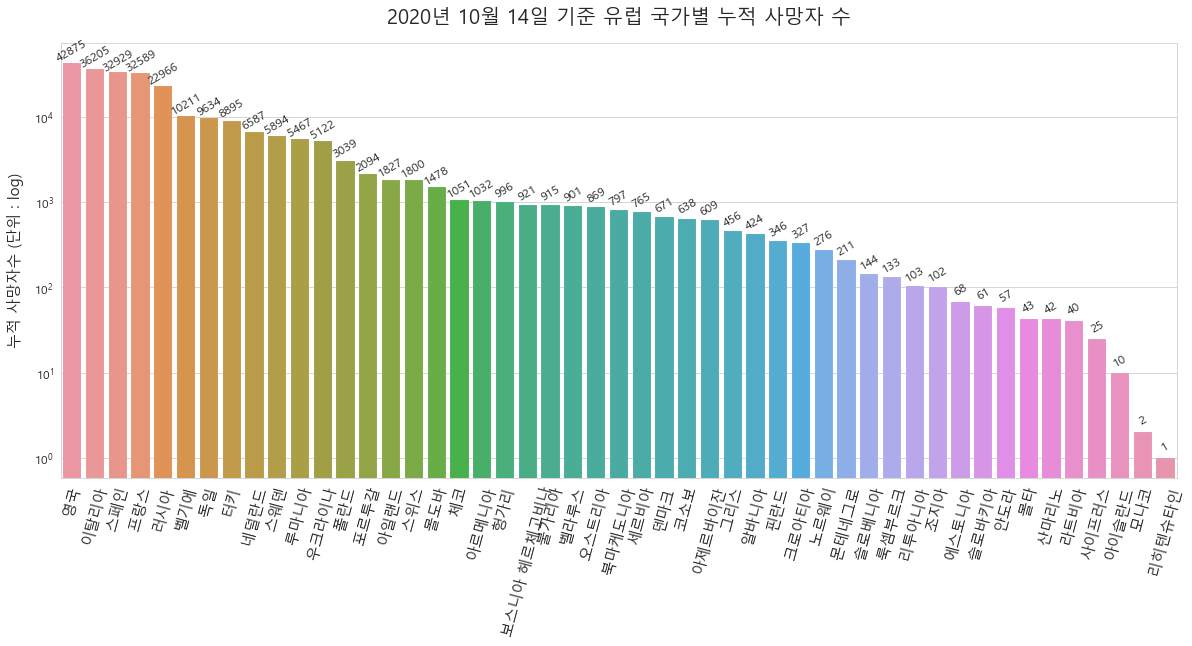

In [73]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 유럽 국가별 누적 사망자 수',fontsize=20, pad = 20)   
g = sns.barplot(eu[eu['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm,
        eu[eu['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt,linewidth=0.1)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=30)
plt.yscale('log')
plt.xlabel('')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.xticks(rotation=75, fontsize=15)
plt.show()

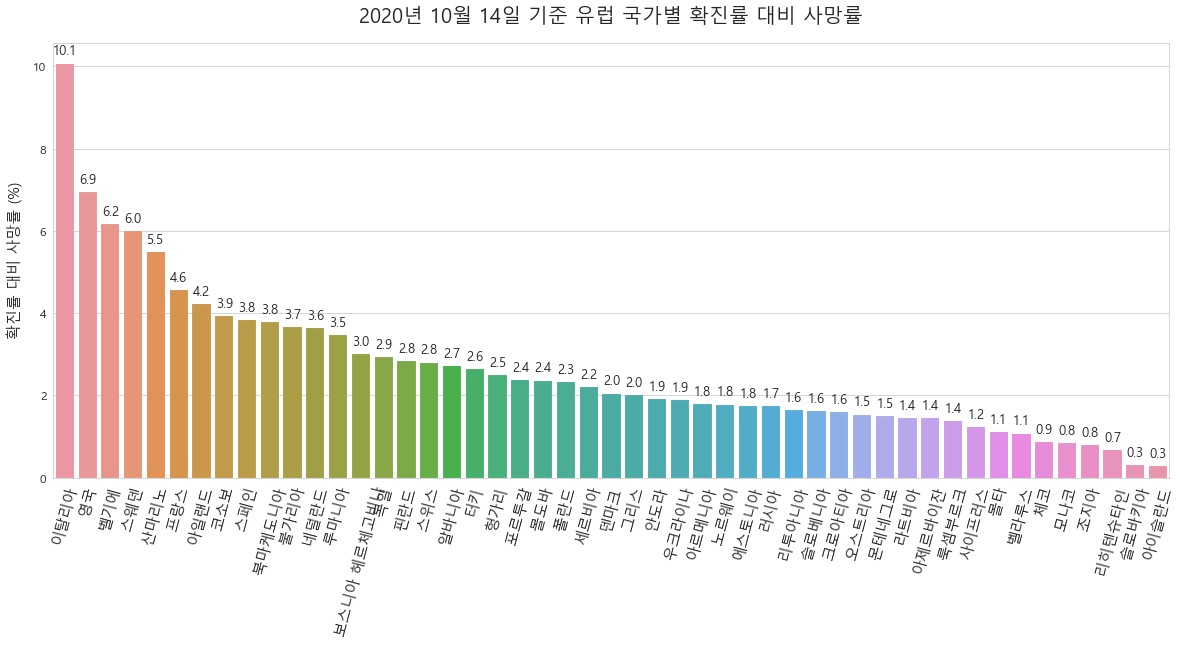

In [74]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 유럽 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(eu[eu['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm,
        eu[eu['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=75, fontsize=15)
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)' ,fontsize=15, labelpad=10)
plt.show()

## 중동 국가별 확진자 / 사망자 수 

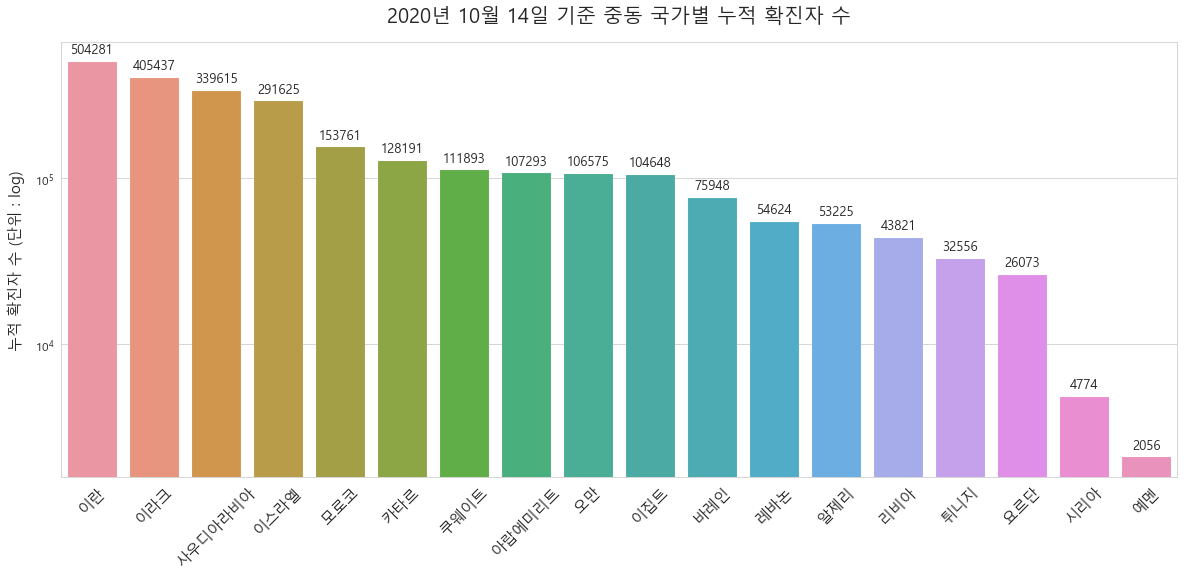

In [75]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 중동 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm,
        jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15)
plt.yscale('log')
plt.xlabel('')
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

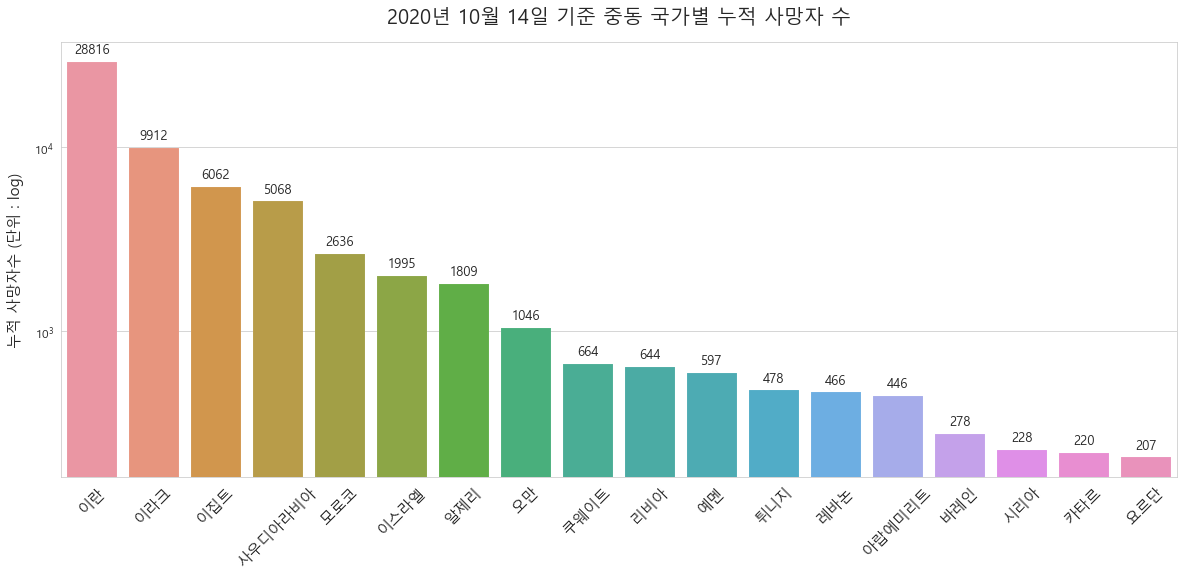

In [76]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 중동 국가별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm,
        jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt,linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15) 
plt.yscale('log')
plt.xlabel('')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

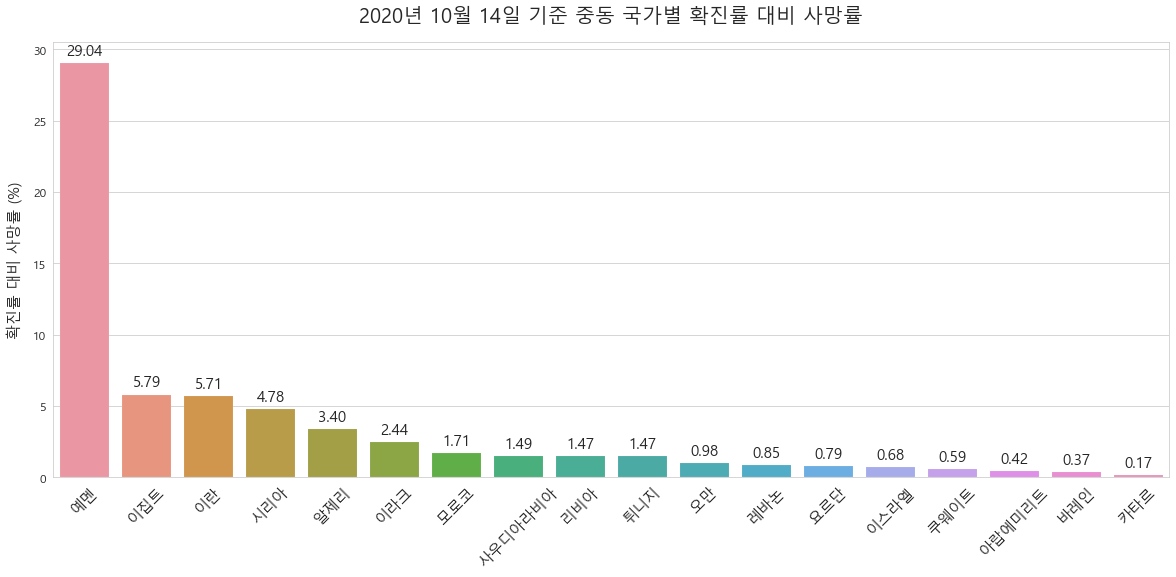

In [77]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 중동 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm,
        jungdong[jungdong['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate,linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

## 아메리카 국가별 확진자 / 사망자 수 

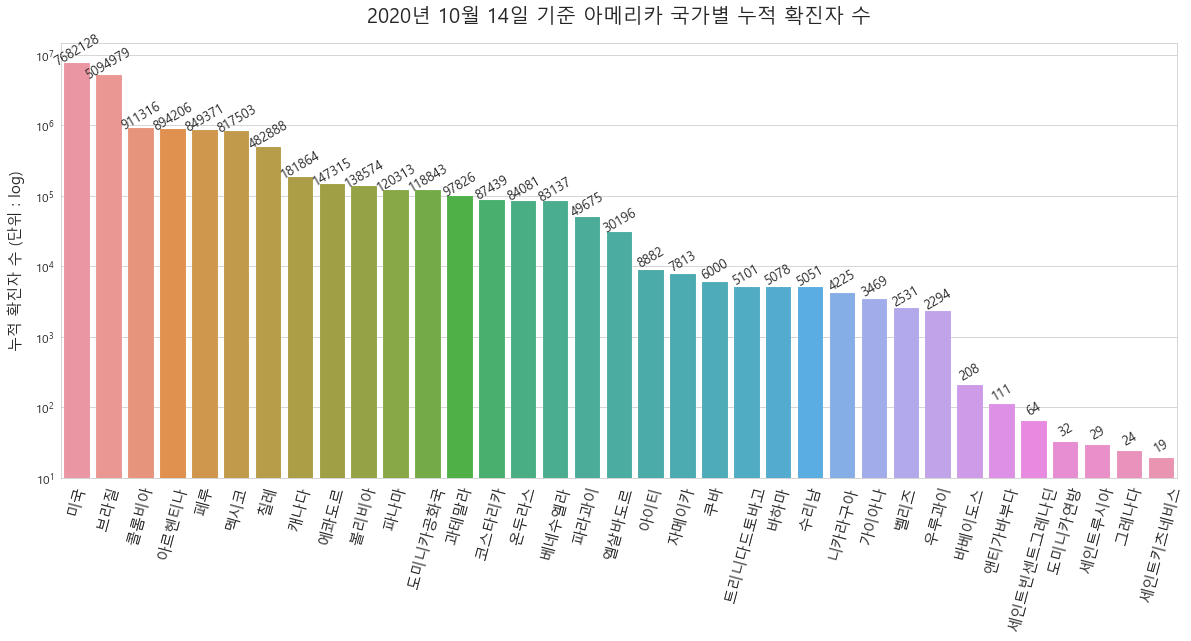

In [78]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아메리카 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(america[america['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm,
        america[america['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=30)
plt.xticks(rotation=75, fontsize=15)
plt.yscale('log') 
plt.xlabel('')
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

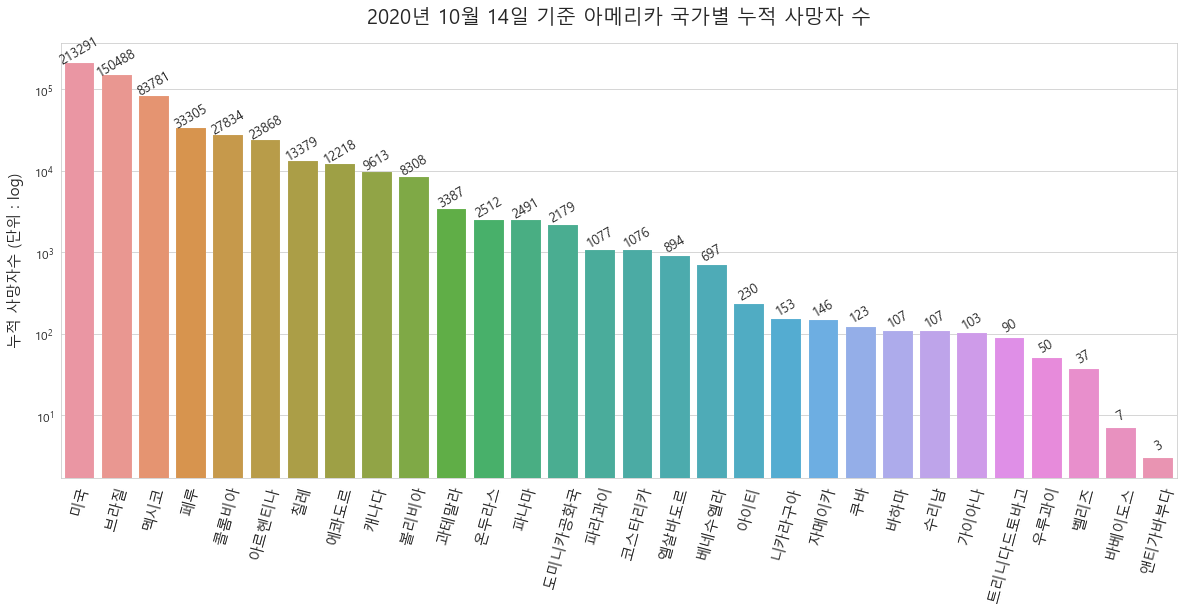

In [79]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아메리카 국가별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(america[america['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm[:-5],
        america[america['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt[:-5],linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=30)
plt.xticks(rotation=75, fontsize=15)
plt.yscale('log') 
plt.xlabel('')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

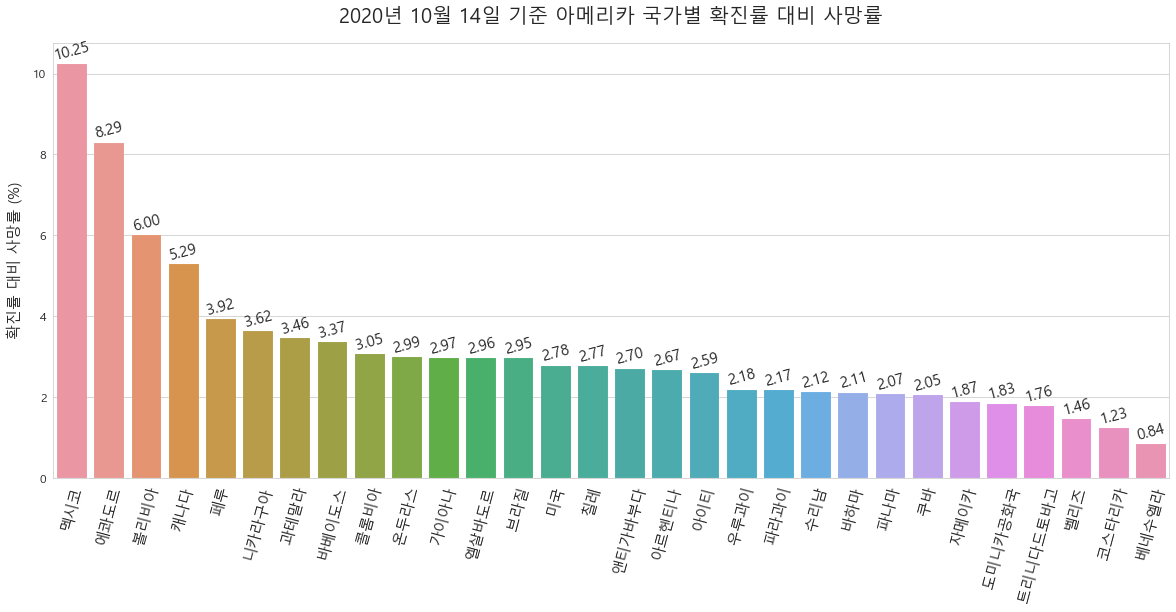

In [80]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아메리카 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(america[america['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm[:-5],
        america[america['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate[:-5],linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=15)
plt.xticks(rotation=75, fontsize=15) 
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)',fontdict=({'size' : 15}), labelpad=10)
plt.show()

## 오세아니아 국가별 확진자 / 사망자 수 

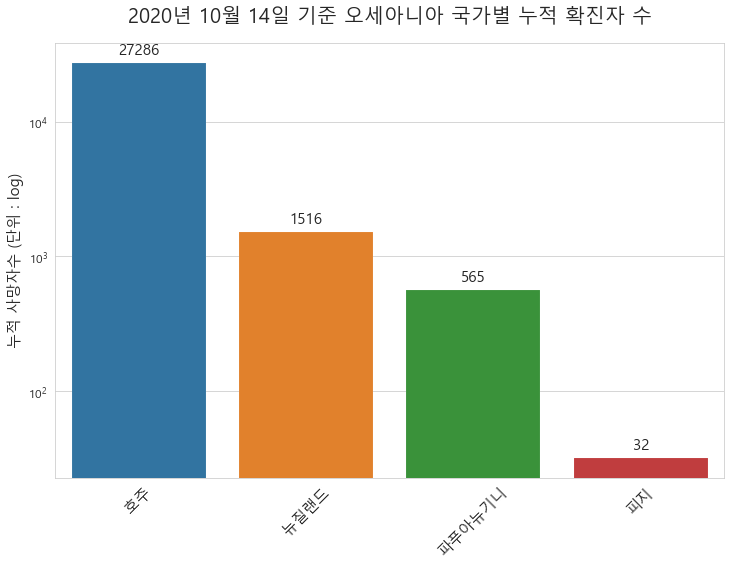

In [81]:
plt.figure(figsize=(12,8)) 
plt.title('2020년 10월 14일 기준 오세아니아 국가별 누적 확진자 수',fontsize=20, pad = 20) 
ratio = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm
labels = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt
g = sns.barplot(ratio,labels,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15) 
plt.yscale('log')
plt.xlabel('')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}))
plt.show()

In [82]:
labels

45274    27286
45275     1516
45277      565
45276       32
Name: natDefCnt, dtype: int64

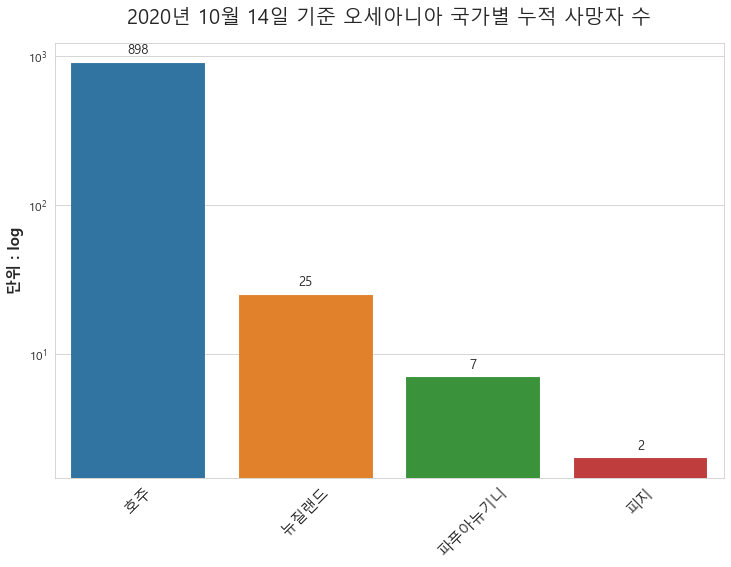

In [83]:
plt.figure(figsize=(12,8)) 
plt.title('2020년 10월 14일 기준 오세아니아 국가별 누적 사망자 수',fontsize=20, pad = 20) 
ratio = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm
labels = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt
g = sns.barplot(ratio,labels,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
#plt.legend(['{} 누적 사망자 수: {}'.format(i,j) for i,j in zip(ratio,labels)])
plt.xticks(rotation=45, fontsize=15)
plt.yscale('log')
plt.xlabel('')
plt.ylabel('단위 : log',fontdict=({'size' : 15, 'weight': 'bold'}))
plt.show()

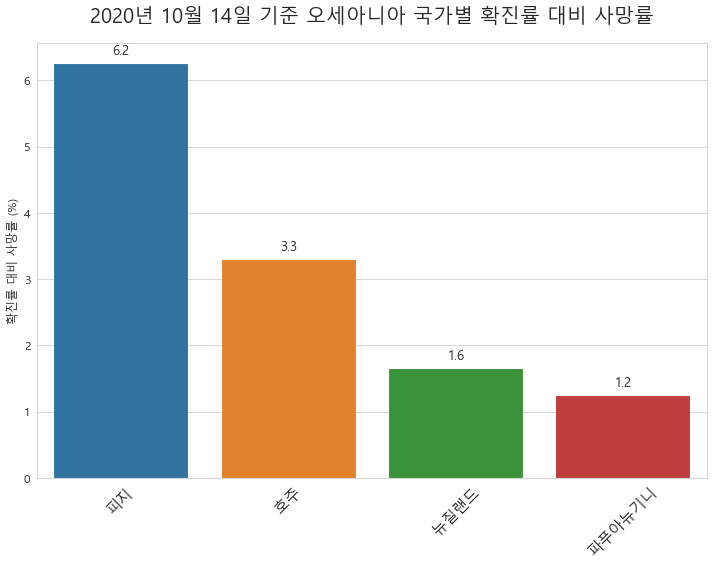

In [84]:
plt.figure(figsize=(12,8)) 
plt.title('2020년 10월 14일 기준 오세아니아 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
latio = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm
labels = ohse[ohse['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate
g = sns.barplot(latio,labels,linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)')
plt.show()

## 아프리카 국가별 확진자 / 사망자 수 

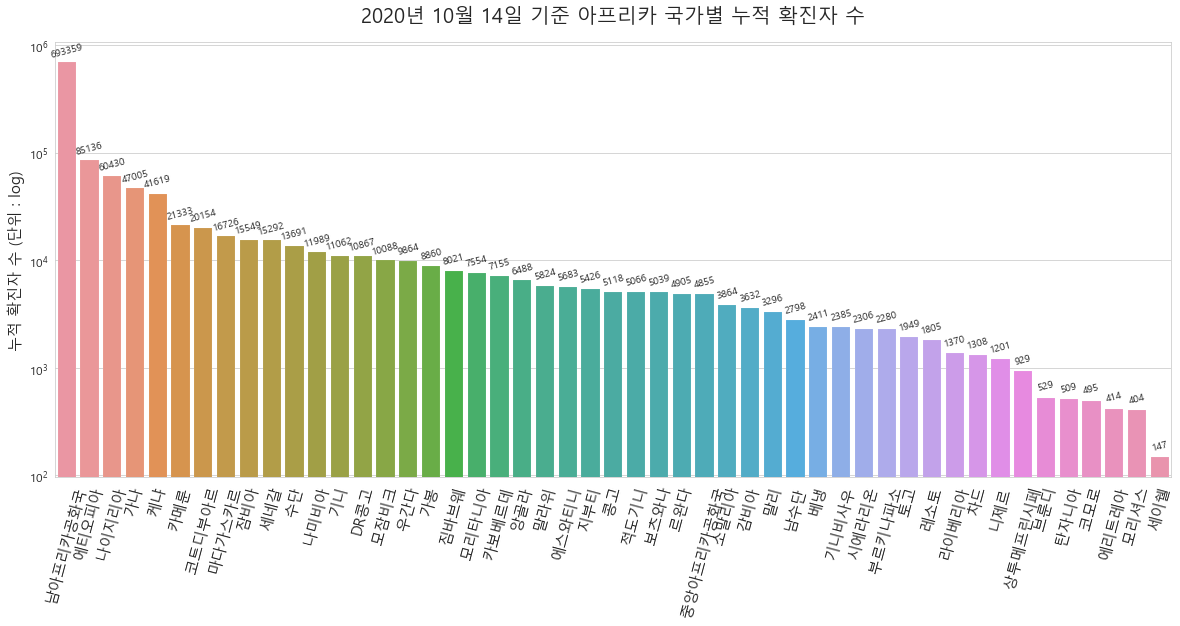

In [85]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아프리카 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(afri[afri['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).nationNm,
        afri[afri['stdDay']=='2020-10-14'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10, xytext = (0, 12), 
                   textcoords = 'offset points',rotation=15)
plt.xticks(rotation=75, fontsize=15)
plt.yscale('log') 
plt.xlabel('')
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}))
plt.show()

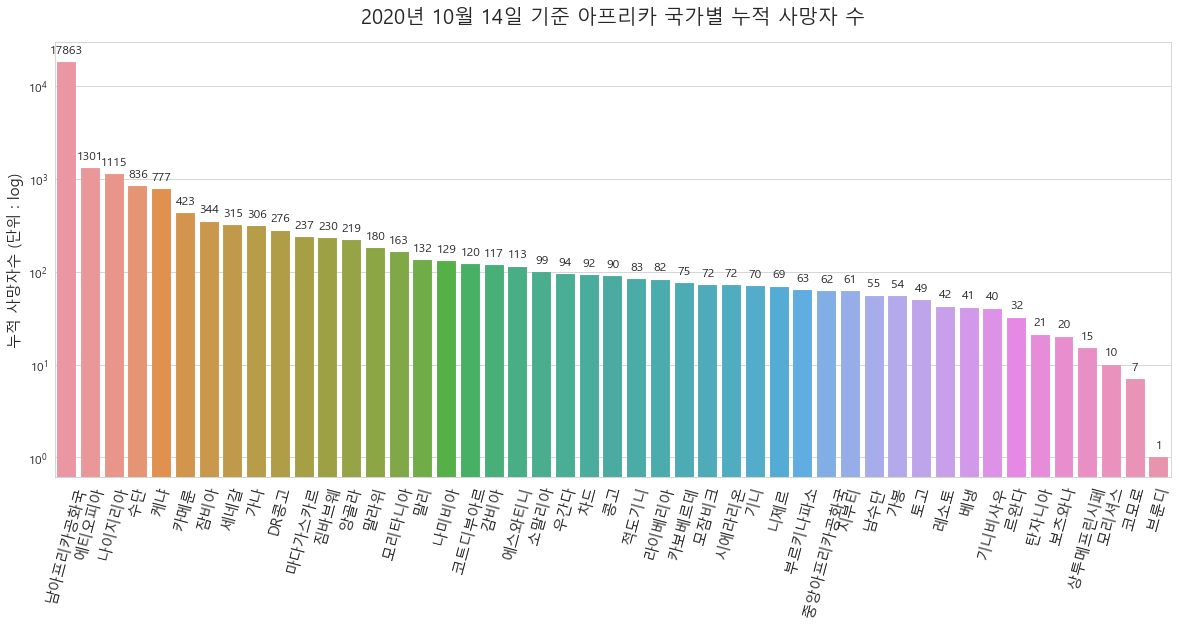

In [86]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아프리카 국가별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(afri[afri['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).nationNm[:-2],
        afri[afri['stdDay']=='2020-10-14'].sort_values('natDeathCnt',ascending=False).natDeathCnt[:-2],linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=75, fontsize=15) 
plt.yscale('log') 
plt.xlabel('')
plt.ylabel('누적 사망자수 (단위 : log)',fontdict=({'size' : 15}))
plt.show()

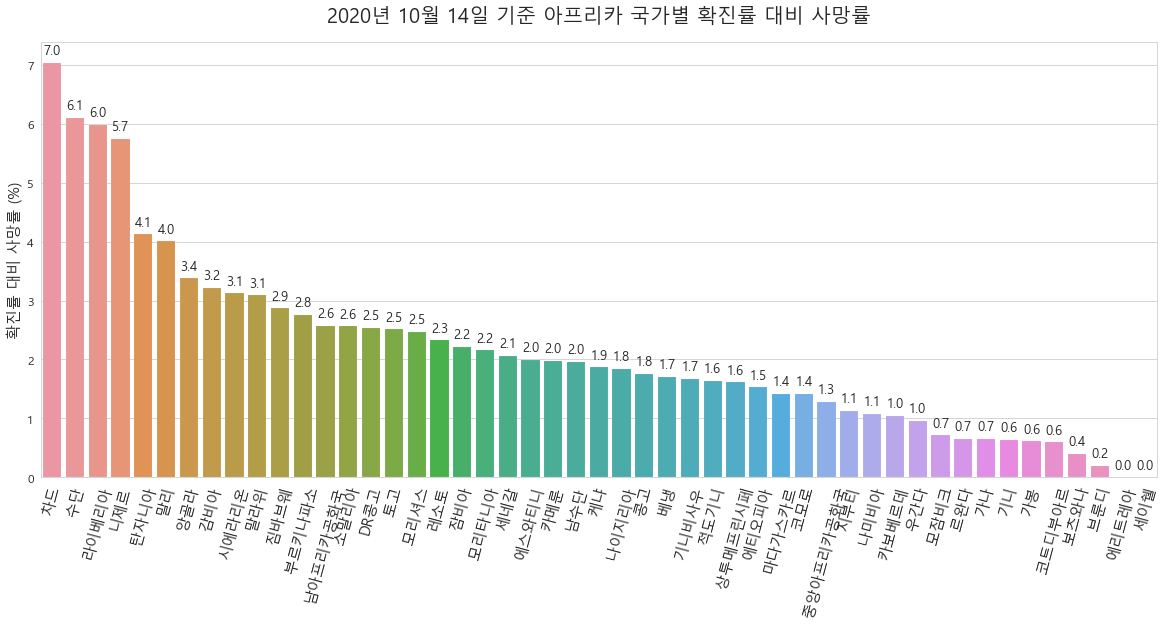

In [87]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 10월 14일 기준 아프리카 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(afri[afri['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).nationNm,
        afri[afri['stdDay']=='2020-10-14'].sort_values('natDeathRate',ascending=False).natDeathRate,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=75, fontsize=15) 
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)',fontsize=15)
plt.show()

## 미주 국가별 확진자 / 사망자 수 

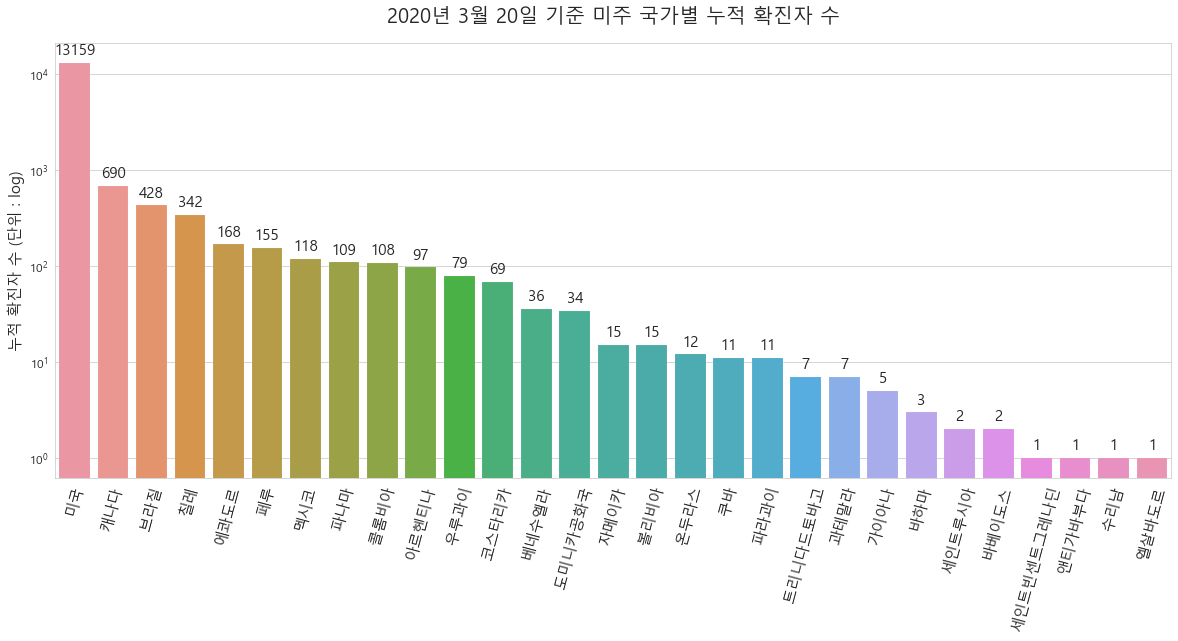

In [88]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 3월 20일 기준 미주 국가별 누적 확진자 수',fontsize=20, pad = 20) 
g = sns.barplot(miju[miju['stdDay']=='2020-03-20'].sort_values('natDefCnt',ascending=False).nationNm,
        miju[miju['stdDay']=='2020-03-20'].sort_values('natDefCnt',ascending=False).natDefCnt,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=75, fontsize=15) 
plt.xlabel('')
plt.yscale('log') 
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}))
plt.show()

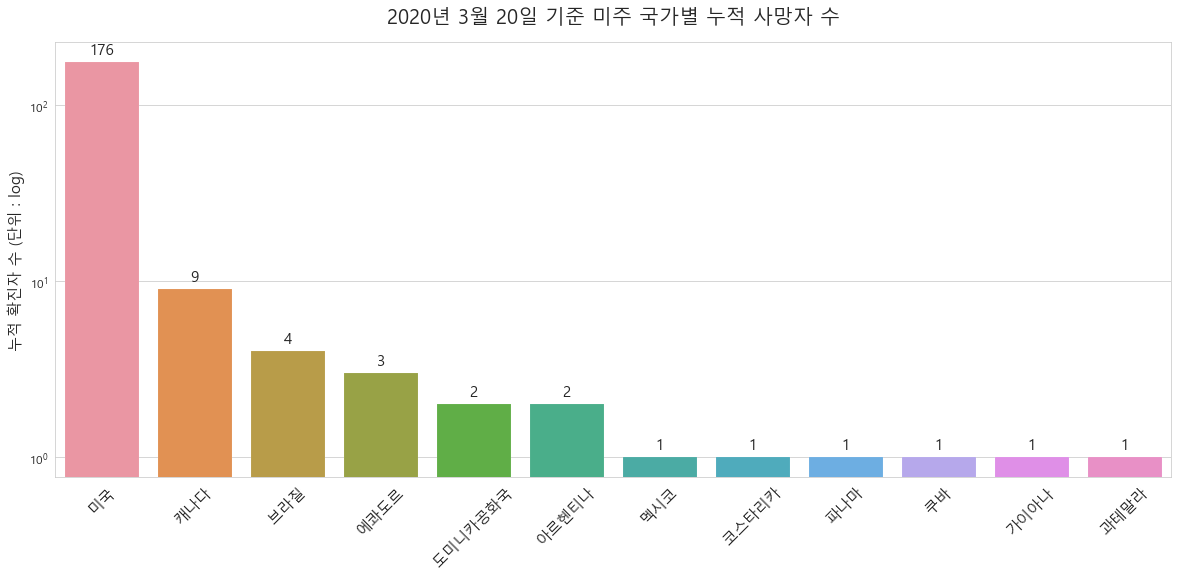

In [89]:
plt.figure(figsize=(20,8)) 
plt.title('2020년 3월 20일 기준 미주 국가별 누적 사망자 수',fontsize=20, pad = 20) 
g = sns.barplot(miju[miju['stdDay']=='2020-03-20'].sort_values('natDeathCnt',ascending=False).nationNm[:-17],
        miju[miju['stdDay']=='2020-03-20'].sort_values('natDeathCnt',ascending=False).natDeathCnt[:-17],linewidth=0.1)  
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=45, fontsize=15) 
plt.xlabel('')
plt.yscale('log') 
plt.ylabel('누적 확진자 수 (단위 : log)',fontdict=({'size' : 15}))
plt.show()

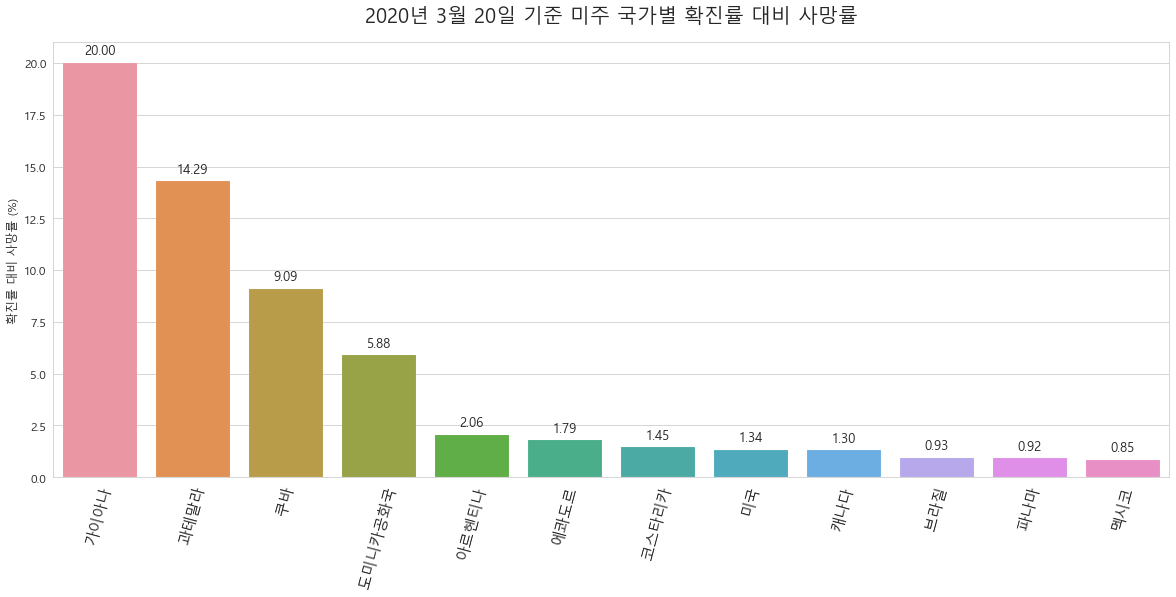

In [90]:
plt.figure(figsize=(20,8)) 
miju_ = miju[miju['stdDay']=='2020-03-20'].sort_values('natDeathRate',ascending=False) 
miju_ = miju_[miju_['natDeathRate']!= 0]
x_ = miju_.nationNm
y_ = miju_.natDeathRate
plt.title('2020년 3월 20일 기준 미주 국가별 확진률 대비 사망률',fontsize=20, pad = 20) 
g = sns.barplot(x_, y_,linewidth=0.1) 
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13, xytext = (0, 12), 
                   textcoords = 'offset points')
plt.xticks(rotation=75, fontsize=15) 
plt.xlabel('') 
plt.ylabel('확진률 대비 사망률 (%)')
plt.show()